In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
death = pd.read_csv("time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
total = pd.read_csv("time_series_covid19_confirmed_global.csv")

In [3]:
death = death[death["Country/Region"] == "Saudi Arabia"]
recovered = recovered[recovered["Country/Region"] == "Saudi Arabia"]
total = total[total["Country/Region"] == "Saudi Arabia"]

In [4]:
lst2 = []
for i in range(1,24):
    a = '7/'+str(i) +'/20'
    lst2.append(a)


In [5]:
lst1 = []
for i in range(26,31):
    a = '6/'+str(i) +'/20'
    lst1.append(a)


In [6]:
f = lst1 + lst2
print(len(f))


28


In [7]:
recovered = recovered[f]
death =  death[f]
total = total[f]

In [8]:
frames = [total,recovered,death]

In [9]:
df = pd.concat(frames)
df

,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,...,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20
192,174577,178504,182493,186436,190823,194225,197608,201801,205929,209509,...,237803,240474,243238,245851,248416,250920,253349,255825,258156,260394
190,120471,122128,124755,127118,130766,132760,137669,140614,143256,145236,...,177560,183048,187622,191161,194218,197735,203259,207259,210398,213490
192,1474,1511,1551,1599,1649,1698,1752,1802,1858,1916,...,2283,2325,2370,2407,2447,2486,2523,2557,2601,2635


In [10]:
df.index = ["confirmed","recovered","death"]

In [14]:
final = df.T

In [12]:
i = 1
j = 0
final["day_stamp"] = [0]*28
for a in final.index:
    final["day_stamp"][j] = i
    i = i + 1
    j = j + 1


In [15]:
final[:5]

,confirmed,recovered,death
6/26/20,174577,120471,1474
6/27/20,178504,122128,1511
6/28/20,182493,124755,1551
6/29/20,186436,127118,1599
6/30/20,190823,130766,1649


In [187]:
Y_train =final["death"][:21]
Y_test = final["death"][21:]
X_train = final[["confirmed","recovered","day_stamp"]][:21]
X_test = final[["confirmed","recovered","day_stamp"]][21:]

In [18]:
import pickle

In [19]:
with open("data.pkl","wb") as f:
    pickle.dump(final,f)
    f.close()

In [188]:
X_test

,confirmed,recovered,day_stamp
7/17/20,245851,191161,22
7/18/20,248416,194218,23
7/19/20,250920,197735,24
7/20/20,253349,203259,25
7/21/20,255825,207259,26
7/22/20,258156,210398,27
7/23/20,260394,213490,28


In [189]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 
from sklearn import preprocessing,tree

In [190]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import datetime


start = datetime.datetime.now()
lr = SGDRegressor()
alpha = [0.00001,0.000001,0.000002,0.000005]
iteration = [300,400,500,600]

c_param = {"alpha": alpha, "max_iter":iteration}
optimal_model = GridSearchCV(lr, param_grid= c_param, scoring = "neg_mean_absolute_error",n_jobs=4, cv=5)

optimal_model.fit(X_train, Y_train)
print(datetime.datetime.now() - start)

0:00:13.746198


In [192]:
print(optimal_model.best_estimator_)

SGDRegressor(alpha=1e-05, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=300,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


In [193]:
y_pred = optimal_model.predict(X_train)
P_train = [int(round(value)) for value in y_pred]
y_pred = optimal_model.predict(X_test)
P_test = [int(round(value)) for value in y_pred]

In [194]:
from sklearn.metrics import mean_absolute_error


In [195]:
train_lr_mape= (mean_absolute_error(Y_train, P_train))/(sum(Y_train)/len(Y_train))
test_lr_mape= (mean_absolute_error(Y_test, P_test))/(sum(Y_test)/len(Y_test))

print("Train mape error is {} and Test mape error is {}".format(train_lr_mape,test_lr_mape))

Train mape error is 0.0075374416891726 and Test mape error is 0.021748980516538285


In [196]:
print(list(Y_train))
print(P_train)

[1474, 1511, 1551, 1599, 1649, 1698, 1752, 1802, 1858, 1916, 1968, 2017, 2059, 2100, 2151, 2181, 2223, 2243, 2283, 2325, 2370]
[1478, 1520, 1566, 1611, 1663, 1703, 1756, 1804, 1851, 1892, 1946, 2000, 2044, 2088, 2127, 2167, 2203, 2244, 2304, 2356, 2404]


In [197]:
print(list(Y_test))
print(P_test)

[2407, 2447, 2486, 2523, 2557, 2601, 2635]
[2447, 2488, 2530, 2581, 2625, 2665, 2704]


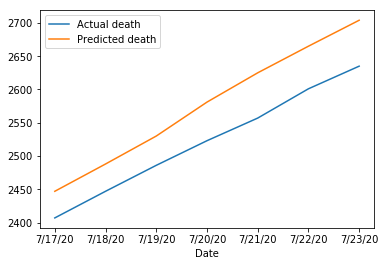

In [198]:
#installing all libraries
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Y_test,label = "Actual death" )
plt.plot(P_test, label = "Predicted death")
plt.xlabel('Date')
plt.legend()
plt.show()